In [1]:
import numpy as np
import matplotlib.pyplot as pl

(np.float64(-0.5), np.float64(6.5), np.float64(8.5), np.float64(-0.5))

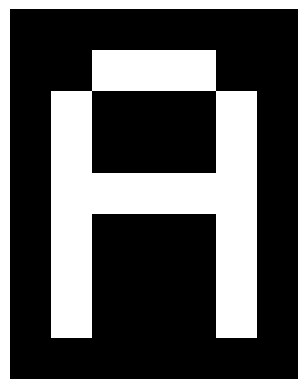

In [2]:
Image0 = np.zeros ((9, 7)) .astype (int)
Image0 [1, 2:5] = 1
Image0 [4, 2:5] = 1
Image0 [2:8, 1] = 1
Image0 [2:8, 5] = 1
pl.imshow (Image0, cmap = 'gray')
pl.axis ('off')

In [3]:
Data = Image0.flatten()
print (Data)

[0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1
 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]


In [4]:
def RLencode (data):
    last = 0
    count = 0
    result = []
    for value in data:
        if value == last:
            count += 1
        else:
            result.append (count)
            last = value
            count = 1
    if count > 0:
        result.append (count)
    return np.array (result)

In [5]:
Encoded1 = RLencode (Data)
print (Encoded1.shape)
print (Encoded1)

(25,)
[9 3 3 1 3 1 2 1 3 1 2 5 2 1 3 1 2 1 3 1 2 1 3 1 8]


In [6]:
def RLdecode (encoded):
    value = 0
    result = []
    for count in encoded:
        result.extend ([value] * count)
        value = 1 - value
    return np.array (result)

In [7]:
Decoded1 = RLdecode (Encoded1)
print (Decoded1.shape)
print (Decoded1)

(63,)
[0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1
 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]


In [8]:
Encoded2 = np.concatenate (([0], Encoded1))
print (Encoded2.shape)
print (Encoded2)

(26,)
[0 9 3 3 1 3 1 2 1 3 1 2 5 2 1 3 1 2 1 3 1 2 1 3 1 8]


In [9]:
Decoded2 = RLdecode (Encoded2)
print (Decoded2.shape)
print (Decoded2)

(63,)
[1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0
 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1]


(np.float64(-0.5), np.float64(6.5), np.float64(8.5), np.float64(-0.5))

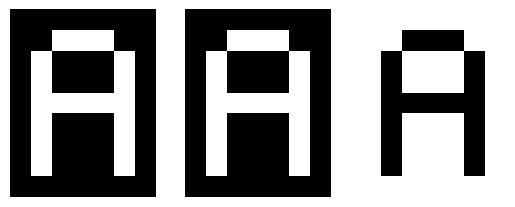

In [10]:
Image1 = Decoded1.reshape (Image0.shape)
Image2 = Decoded2.reshape (Image0.shape)

pl.subplot (1, 3, 1); pl.imshow (Image0, cmap = 'gray'); pl.axis ('off')
pl.subplot (1, 3, 2); pl.imshow (Image1, cmap = 'gray'); pl.axis ('off')
pl.subplot (1, 3, 3); pl.imshow (Image2, cmap = 'gray'); pl.axis ('off')